## Modeling eccentricity and period of BBH inspiral with large initial period 

Simona Miller, LIGO SURF 2018, (Last edited: July 2, 2018)

Here, I model eccentricity and period evolution for a BBH system with an initial period of one year, or a frequency of 1.1574e-5 Hz (GW frequency of 2.3148e-5 Hz), instead of an initial period of 0.1s aka GW frequency of 20 Hz (start of LIGO band).   

In [41]:
import numpy as np
import scipy as sp
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [42]:
# Define some constants: 
pi = np.pi
c = 2.99792458e8    # m/s
G = 6.67259e-11     # m^3/kg/s^2
Msun = 1.989e30     # kg

In [43]:
# Initial period (in s):
P0 = 86400 # one day

# Initial eccentricity: 
e0 = 0.4

# Masses (in solar units): 
m1 = 10
m2 = 10

# Differential time step (in s): 
dt = 3.154e12 # 100,000 years

In [44]:
# Function to calculate first derivate of orbital period 
# from current orbital period and eccentricity using equation in 
# header 

# P = Period in s, e = eccentricity (unitless), m1 and m2 = masses 
# in solar mass units

per_constant_num = -192*pi*((2*pi*G)**(5.0/3))
per_constant_denom = 5*(c**5)
per_constant = (per_constant_num/per_constant_denom)

def DerivativeOrbitalPeriod(P,e,m1,m2):

    m1 = m1*Msun
    m2 = m2*Msun
    
    term1 = P**(-5.0/3)
    term2 = m1*m2/((m1+m2)**(1.0/3))
    term3 = 1 + (73.0/24)*(e**2) + (37.0/96)*(e**4)
    term4 = (1-e**2)**(-7.0/2)
   
    dPdt = per_constant*term1*term2*term3*term4
        
    return dPdt

In [45]:
# Function to calculate first derivate of eccentricity
# from current orbital period and eccentricity using equation in 
# header 

# P = Period in s, e = eccentricity (unitless), m1 and m2 = masses 
# in solar mass units

ecc_constant_num = -608*pi*((2*pi*G)**(5.0/3))
ecc_constant_denom = 15*(c**5)
ecc_constant = (ecc_constant_num/ecc_constant_denom)

def DerivativeEccentricity(P,e,m1,m2):
    
    m1 = m1*Msun
    m2 = m2*Msun
    
    term1 = e/P
    term2 = P**(-5.0/3)
    term3 = m1*m2/((m1+m2)**(1.0/3))
    term4 = 1 + (121.0/304)*(e**2) 
    term5 = (1-e**2)**(-5.0/2)
    
    dedt = ecc_constant*term1*term2*term3*term4*term5
    
    return dedt

In [46]:
# Function to create time series for period and eccentricity

# P0 = initial period in s, e0 = initial eccentricity (unitless), 
# m1 and m2 = masses in solar mass units, dt = differential time step in s

def CreateTimeSeries(P0,e0,m1,m2,dt): 
    
    # Setting initial values:
    t = 0     
    P = P0
    e = e0
    
    # Creating time series:
    ts = [t]
    pts = [P]
    ets = [e]
    
    numsteps = 0
    
    # Calculating final period - corresponding to ISCO 
    Pf = np.sqrt(864)*pi*G*(m1+m2)/(np.power(c,3))
    print "Period at ISCO:", Pf
    
    #while P > Pf:
    for i in range(0,100000):
            
        # Calculate change in orbital period in one differential time step
        print "Period:", P
        dPdt = DerivativeOrbitalPeriod(P,e,m1,m2)

        # Calculate change in eccentricity in one differential time step
        print "Eccentricity: ", e, "\n"
        dedt = DerivativeEccentricity(P,e,m1,m2)
            
        # Update values for orbital period and eccentricity
        P = P + dPdt*dt
        e = e + dedt*dt
        
        # If P and e are valid, add to respective time series: 
        if P <= 0 or e <= 0: 
            print "Negative or zero value value! Loop terminated."
            break      
        pts.append(P)
        ets.append(e)
        
        # Advance one time step
        t = t + dt 
        ts.append(t)
            
        numsteps = numsteps + 1
    
    print "Finished. Number of dt steps = ", numsteps
    
    return ts, pts, ets

In [47]:
# Testing time series function

ts, pts, ets  = CreateTimeSeries(P0,e0,m1,m2,dt)

Period at ISCO: 4.57371470492e-33
Period: 86400
Eccentricity:  0.4 

Period: 86393.0230799
Eccentricity:  0.399979643801 

Period: 86386.0459345
Eccentricity:  0.399959285364 

Period: 86379.0685636
Eccentricity:  0.39993892469 

Period: 86372.0909673
Eccentricity:  0.399918561777 

Period: 86365.1131453
Eccentricity:  0.399898196626 

Period: 86358.1350978
Eccentricity:  0.399877829235 

Period: 86351.1568245
Eccentricity:  0.399857459605 

Period: 86344.1783254
Eccentricity:  0.399837087734 

Period: 86337.1996005
Eccentricity:  0.399816713623 

Period: 86330.2206496
Eccentricity:  0.39979633727 

Period: 86323.2414727
Eccentricity:  0.399775958675 

Period: 86316.2620697
Eccentricity:  0.399755577838 

Period: 86309.2824406
Eccentricity:  0.399735194757 

Period: 86302.3025852
Eccentricity:  0.399714809434 

Period: 86295.3225036
Eccentricity:  0.399694421866 

Period: 86288.3421955
Eccentricity:  0.399674032053 

Period: 86281.361661
Eccentricity:  0.399653639996 

Period: 86274.38


Period: 84704.8389565
Eccentricity:  0.395007301806 

Period: 84697.8052969
Eccentricity:  0.394986388338 

Period: 84690.7713933
Eccentricity:  0.3949654725 

Period: 84683.7372456
Eccentricity:  0.39494455429 

Period: 84676.7028539
Eccentricity:  0.394923633708 

Period: 84669.668218
Eccentricity:  0.394902710753 

Period: 84662.6333377
Eccentricity:  0.394881785425 

Period: 84655.5982132
Eccentricity:  0.394860857723 

Period: 84648.5628442
Eccentricity:  0.394839927647 

Period: 84641.5272306
Eccentricity:  0.394818995195 

Period: 84634.4913725
Eccentricity:  0.394798060368 

Period: 84627.4552697
Eccentricity:  0.394777123165 

Period: 84620.4189222
Eccentricity:  0.394756183585 

Period: 84613.3823298
Eccentricity:  0.394735241627 

Period: 84606.3454924
Eccentricity:  0.394714297291 

Period: 84599.3084101
Eccentricity:  0.394693350577 

Period: 84592.2710827
Eccentricity:  0.394672401484 

Period: 84585.2335101
Eccentricity:  0.394651450011 

Period: 84578.1956923
Eccentric

Period: 81563.8272761
Eccentricity:  0.385501789128 

Period: 81556.6771347
Eccentricity:  0.385479765084 

Period: 81549.52671
Eccentricity:  0.385457738388 

Period: 81542.3760021
Eccentricity:  0.38543570904 

Period: 81535.2250106
Eccentricity:  0.385413677038 

Period: 81528.0737357
Eccentricity:  0.385391642382 

Period: 81520.922177
Eccentricity:  0.385369605071 

Period: 81513.7703347
Eccentricity:  0.385347565105 

Period: 81506.6182085
Eccentricity:  0.385325522483 

Period: 81499.4657984
Eccentricity:  0.385303477203 

Period: 81492.3131043
Eccentricity:  0.385281429267 

Period: 81485.160126
Eccentricity:  0.385259378672 

Period: 81478.0068635
Eccentricity:  0.385237325418 

Period: 81470.8533167
Eccentricity:  0.385215269504 

Period: 81463.6994855
Eccentricity:  0.385193210931 

Period: 81456.5453697
Eccentricity:  0.385171149696 

Period: 81449.3909694
Eccentricity:  0.385149085799 

Period: 81442.2362843
Eccentricity:  0.38512701924 

Period: 81435.0813144
Eccentricity

Period: 77870.9136388
Eccentricity:  0.373885719251 

Period: 77863.6050327
Eccentricity:  0.37386224262 

Period: 77856.2960873
Eccentricity:  0.373838762941 

Period: 77848.9868026
Eccentricity:  0.373815280211 

Period: 77841.6771783
Eccentricity:  0.373791794432 

Period: 77834.3672144
Eccentricity:  0.3737683056 

Period: 77827.0569107
Eccentricity:  0.373744813716 

Period: 77819.7462672
Eccentricity:  0.373721318779 

Period: 77812.4352836
Eccentricity:  0.373697820788 

Period: 77805.1239599
Eccentricity:  0.373674319741 

Period: 77797.812296
Eccentricity:  0.373650815639 

Period: 77790.5002916
Eccentricity:  0.37362730848 

Period: 77783.1879468
Eccentricity:  0.373603798263 

Period: 77775.8752614
Eccentricity:  0.373580284988 

Period: 77768.5622352
Eccentricity:  0.373556768653 

Period: 77761.2488682
Eccentricity:  0.373533249258 

Period: 77753.9351601
Eccentricity:  0.373509726802 

Period: 77746.6211109
Eccentricity:  0.373486201284 

Period: 77739.3067205
Eccentricit

Eccentricity:  0.361018073909 

Period: 73946.5463308
Eccentricity:  0.360992852304 

Period: 73939.0390468
Eccentricity:  0.360967627128 

Period: 73931.5313489
Eccentricity:  0.360942398379 

Period: 73924.023237
Eccentricity:  0.360917166056 

Period: 73916.5147108
Eccentricity:  0.360891930158 

Period: 73909.0057702
Eccentricity:  0.360866690684 

Period: 73901.4964151
Eccentricity:  0.360841447633 

Period: 73893.9866452
Eccentricity:  0.360816201003 

Period: 73886.4764604
Eccentricity:  0.360790950795 

Period: 73878.9658607
Eccentricity:  0.360765697005 

Period: 73871.4548456
Eccentricity:  0.360740439634 

Period: 73863.9434153
Eccentricity:  0.360715178681 

Period: 73856.4315694
Eccentricity:  0.360689914143 

Period: 73848.9193078
Eccentricity:  0.360664646021 

Period: 73841.4066304
Eccentricity:  0.360639374312 

Period: 73833.8935369
Eccentricity:  0.360614099016 

Period: 73826.3800273
Eccentricity:  0.360588820131 

Period: 73818.8661013
Eccentricity:  0.360563537657

Period: 70199.5737671
Eccentricity:  0.348126914093 

Period: 70191.8415712
Eccentricity:  0.348099783263 

Period: 70184.1088706
Eccentricity:  0.348072648231 

Period: 70176.3756652
Eccentricity:  0.348045508994 

Period: 70168.6419547
Eccentricity:  0.348018365552 

Period: 70160.9077389
Eccentricity:  0.347991217902 

Period: 70153.1730175
Eccentricity:  0.347964066044 

Period: 70145.4377905
Eccentricity:  0.347936909976 

Period: 70137.7020575
Eccentricity:  0.347909749697 

Period: 70129.9658184
Eccentricity:  0.347882585204 

Period: 70122.2290728
Eccentricity:  0.347855416497 

Period: 70114.4918208
Eccentricity:  0.347828243575 

Period: 70106.7540619
Eccentricity:  0.347801066434 

Period: 70099.015796
Eccentricity:  0.347773885075 

Period: 70091.277023
Eccentricity:  0.347746699496 

Period: 70083.5377425
Eccentricity:  0.347719509695 

Period: 70075.7979543
Eccentricity:  0.34769231567 

Period: 70068.0576583
Eccentricity:  0.347665117421 

Period: 70060.3168543
Eccentric

Eccentricity:  0.333444591056 

Period: 66105.4041789
Eccentricity:  0.333415061627 

Period: 66097.3778406
Eccentricity:  0.333385527111 

Period: 66089.3508685
Eccentricity:  0.333355987504 

Period: 66081.3232624
Eccentricity:  0.333326442807 

Period: 66073.2950218
Eccentricity:  0.333296893015 

Period: 66065.2661465
Eccentricity:  0.333267338128 

Period: 66057.2366363
Eccentricity:  0.333237778143 

Period: 66049.2064908
Eccentricity:  0.333208213058 

Period: 66041.1757097
Eccentricity:  0.333178642872 

Period: 66033.1442928
Eccentricity:  0.333149067582 

Period: 66025.1122398
Eccentricity:  0.333119487186 

Period: 66017.0795503
Eccentricity:  0.333089901683 

Period: 66009.0462241
Eccentricity:  0.33306031107 

Period: 66001.0122608
Eccentricity:  0.333030715346 

Period: 65992.9776603
Eccentricity:  0.333001114508 

Period: 65984.9424221
Eccentricity:  0.332971508554 

Period: 65976.906546
Eccentricity:  0.332941897482 

Period: 65968.8700317
Eccentricity:  0.332912281291 

Eccentricity:  0.318388157316 

Period: 62107.1385082
Eccentricity:  0.318355881544 

Period: 62098.7641143
Eccentricity:  0.31832359954 

Period: 62090.388918
Eccentricity:  0.3182913113 

Period: 62082.0129186
Eccentricity:  0.318259016822 

Period: 62073.6361159
Eccentricity:  0.318226716102 

Period: 62065.2585094
Eccentricity:  0.318194409138 

Period: 62056.8800986
Eccentricity:  0.318162095928 

Period: 62048.5008833
Eccentricity:  0.318129776468 

Period: 62040.120863
Eccentricity:  0.318097450756 

Period: 62031.7400372
Eccentricity:  0.318065118789 

Period: 62023.3584055
Eccentricity:  0.318032780564 

Period: 62014.9759677
Eccentricity:  0.318000436079 

Period: 62006.5927231
Eccentricity:  0.31796808533 

Period: 61998.2086715
Eccentricity:  0.317935728315 

Period: 61989.8238123
Eccentricity:  0.31790336503 

Period: 61981.4381453
Eccentricity:  0.317870995474 

Period: 61973.0516699
Eccentricity:  0.317838619644 

Period: 61964.6643858
Eccentricity:  0.317806237536 

Per

Eccentricity:  0.301660050728 

Period: 57872.2762118
Eccentricity:  0.301624321855 

Period: 57863.4495717
Eccentricity:  0.301588585097 

Period: 57854.6218829
Eccentricity:  0.301552840452 

Period: 57845.7931447
Eccentricity:  0.301517087915 

Period: 57836.9633566
Eccentricity:  0.301481327482 

Period: 57828.1325179
Eccentricity:  0.301445559149 

Period: 57819.3006281
Eccentricity:  0.301409782912 

Period: 57810.4676865
Eccentricity:  0.301373998767 

Period: 57801.6336925
Eccentricity:  0.30133820671 

Period: 57792.7986455
Eccentricity:  0.301302406736 

Period: 57783.9625449
Eccentricity:  0.301266598843 

Period: 57775.1253901
Eccentricity:  0.301230783024 

Period: 57766.2871805
Eccentricity:  0.301194959278 

Period: 57757.4479154
Eccentricity:  0.301159127598 

Period: 57748.6075942
Eccentricity:  0.301123287982 

Period: 57739.7662164
Eccentricity:  0.301087440426 

Period: 57730.9237814
Eccentricity:  0.301051584924 

Period: 57722.0802884
Eccentricity:  0.301015721474

Period: 53238.4757563
Eccentricity:  0.282355767843 

Period: 53229.0248488
Eccentricity:  0.28231541631 

Period: 53219.5725005
Eccentricity:  0.282275054292 

Period: 53210.1187104
Eccentricity:  0.282234681782 

Period: 53200.6634776
Eccentricity:  0.282194298774 

Period: 53191.206801
Eccentricity:  0.282153905261 

Period: 53181.7486796
Eccentricity:  0.282113501236 

Period: 53172.2891125
Eccentricity:  0.282073086693 

Period: 53162.8280988
Eccentricity:  0.282032661627 

Period: 53153.3656373
Eccentricity:  0.281992226029 

Period: 53143.9017272
Eccentricity:  0.281951779895 

Period: 53134.4363675
Eccentricity:  0.281911323216 

Period: 53124.9695571
Eccentricity:  0.281870855988 

Period: 53115.5012951
Eccentricity:  0.281830378203 

Period: 53106.0315804
Eccentricity:  0.281789889854 

Period: 53096.5604122
Eccentricity:  0.281749390936 

Period: 53087.0877894
Eccentricity:  0.281708881442 

Period: 53077.613711
Eccentricity:  0.281668361365 

Period: 53068.138176
Eccentrici

Eccentricity:  0.261045008339 

Period: 48371.9087513
Eccentricity:  0.260998553589 

Period: 48361.6028817
Eccentricity:  0.260952084178 

Period: 48351.2949305
Eccentricity:  0.260905600096 

Period: 48340.984896
Eccentricity:  0.26085910133 

Period: 48330.6727766
Eccentricity:  0.260812587871 

Period: 48320.3585705
Eccentricity:  0.260766059707 

Period: 48310.042276
Eccentricity:  0.260719516827 

Period: 48299.7238914
Eccentricity:  0.260672959219 

Period: 48289.4034149
Eccentricity:  0.260626386872 

Period: 48279.0808449
Eccentricity:  0.260579799776 

Period: 48268.7561795
Eccentricity:  0.260533197919 

Period: 48258.4294171
Eccentricity:  0.26048658129 

Period: 48248.100556
Eccentricity:  0.260439949877 

Period: 48237.7695944
Eccentricity:  0.26039330367 

Period: 48227.4365305
Eccentricity:  0.260346642656 

Period: 48217.1013627
Eccentricity:  0.260299966826 

Period: 48206.7640892
Eccentricity:  0.260253276167 

Period: 48196.4247082
Eccentricity:  0.260206570668 

Pe

Eccentricity:  0.240141361659 

Period: 43847.4288339
Eccentricity:  0.240087589925 

Period: 43836.0687762
Eccentricity:  0.240033797318 

Period: 43824.7056713
Eccentricity:  0.239979983818 

Period: 43813.3395162
Eccentricity:  0.239926149404 

Period: 43801.9703079
Eccentricity:  0.239872294058 

Period: 43790.5980432
Eccentricity:  0.239818417759 

Period: 43779.222719
Eccentricity:  0.239764520488 

Period: 43767.8443323
Eccentricity:  0.239710602224 

Period: 43756.4628799
Eccentricity:  0.239656662948 

Period: 43745.0783587
Eccentricity:  0.23960270264 

Period: 43733.6907657
Eccentricity:  0.23954872128 

Period: 43722.3000976
Eccentricity:  0.239494718847 

Period: 43710.9063513
Eccentricity:  0.239440695323 

Period: 43699.5095237
Eccentricity:  0.239386650686 

Period: 43688.1096117
Eccentricity:  0.239332584917 

Period: 43676.7066122
Eccentricity:  0.239278497996 

Period: 43665.3005219
Eccentricity:  0.239224389902 

Period: 43653.8913378
Eccentricity:  0.239170260615 


Eccentricity:  0.213211276797 

Period: 38318.2934231
Eccentricity:  0.213145381184 

Period: 38305.1333478
Eccentricity:  0.213079451187 

Period: 38291.9680923
Eccentricity:  0.213013486763 

Period: 38278.7976494
Eccentricity:  0.212947487866 

Period: 38265.6220121
Eccentricity:  0.212881454452 

Period: 38252.4411733
Eccentricity:  0.212815386477 

Period: 38239.2551259
Eccentricity:  0.212749283895 

Period: 38226.0638628
Eccentricity:  0.212683146662 

Period: 38212.8673767
Eccentricity:  0.212616974732 

Period: 38199.6656606
Eccentricity:  0.212550768061 

Period: 38186.4587072
Eccentricity:  0.212484526603 

Period: 38173.2465095
Eccentricity:  0.212418250313 

Period: 38160.0290601
Eccentricity:  0.212351939146 

Period: 38146.8063518
Eccentricity:  0.212285593056 

Period: 38133.5783774
Eccentricity:  0.212219211997 

Period: 38120.3451297
Eccentricity:  0.212152795925 

Period: 38107.1066014
Eccentricity:  0.212086344792 

Period: 38093.8627851
Eccentricity:  0.21201985855

Period: 30247.5768162
Eccentricity:  0.171171251399 

Period: 30229.9704646
Eccentricity:  0.171076452375 

Period: 30212.3506889
Eccentricity:  0.170981567772 

Period: 30194.7174573
Eccentricity:  0.170886597392 

Period: 30177.0707376
Eccentricity:  0.170791541039 

Period: 30159.4104978
Eccentricity:  0.170696398515 

Period: 30141.7367055
Eccentricity:  0.170601169622 

Period: 30124.0493283
Eccentricity:  0.170505854161 

Period: 30106.3483337
Eccentricity:  0.170410451932 

Period: 30088.6336891
Eccentricity:  0.170314962735 

Period: 30070.9053616
Eccentricity:  0.170219386368 

Period: 30053.1633184
Eccentricity:  0.17012372263 

Period: 30035.4075264
Eccentricity:  0.170027971318 

Period: 30017.6379524
Eccentricity:  0.169932132227 

Period: 29999.8545633
Eccentricity:  0.169836205155 

Period: 29982.0573255
Eccentricity:  0.169740189895 

Period: 29964.2462056
Eccentricity:  0.169644086242 

Period: 29946.4211698
Eccentricity:  0.169547893989 

Period: 29928.5821844
Eccentr

Period: 18874.5507041
Eccentricity:  0.107529366223 

Period: 18840.0897225
Eccentricity:  0.107330587706 

Period: 18805.5331974
Eccentricity:  0.107131232299 

Period: 18770.8803876
Eccentricity:  0.106931295622 

Period: 18736.1305426
Eccentricity:  0.106730773241 

Period: 18701.2829024
Eccentricity:  0.106529660668 

Period: 18666.3366975
Eccentricity:  0.106327953359 

Period: 18631.2911484
Eccentricity:  0.10612564671 

Period: 18596.1454658
Eccentricity:  0.105922736063 

Period: 18560.8988504
Eccentricity:  0.105719216698 

Period: 18525.5504923
Eccentricity:  0.105515083835 

Period: 18490.0995714
Eccentricity:  0.105310332635 

Period: 18454.5452567
Eccentricity:  0.105104958193 

Period: 18418.8867064
Eccentricity:  0.104898955544 

Period: 18383.1230677
Eccentricity:  0.104692319657 

Period: 18347.2534766
Eccentricity:  0.104485045434 

Period: 18311.2770573
Eccentricity:  0.104277127712 

Period: 18275.1929227
Eccentricity:  0.10406856126 

Period: 18239.0001735
Eccentri

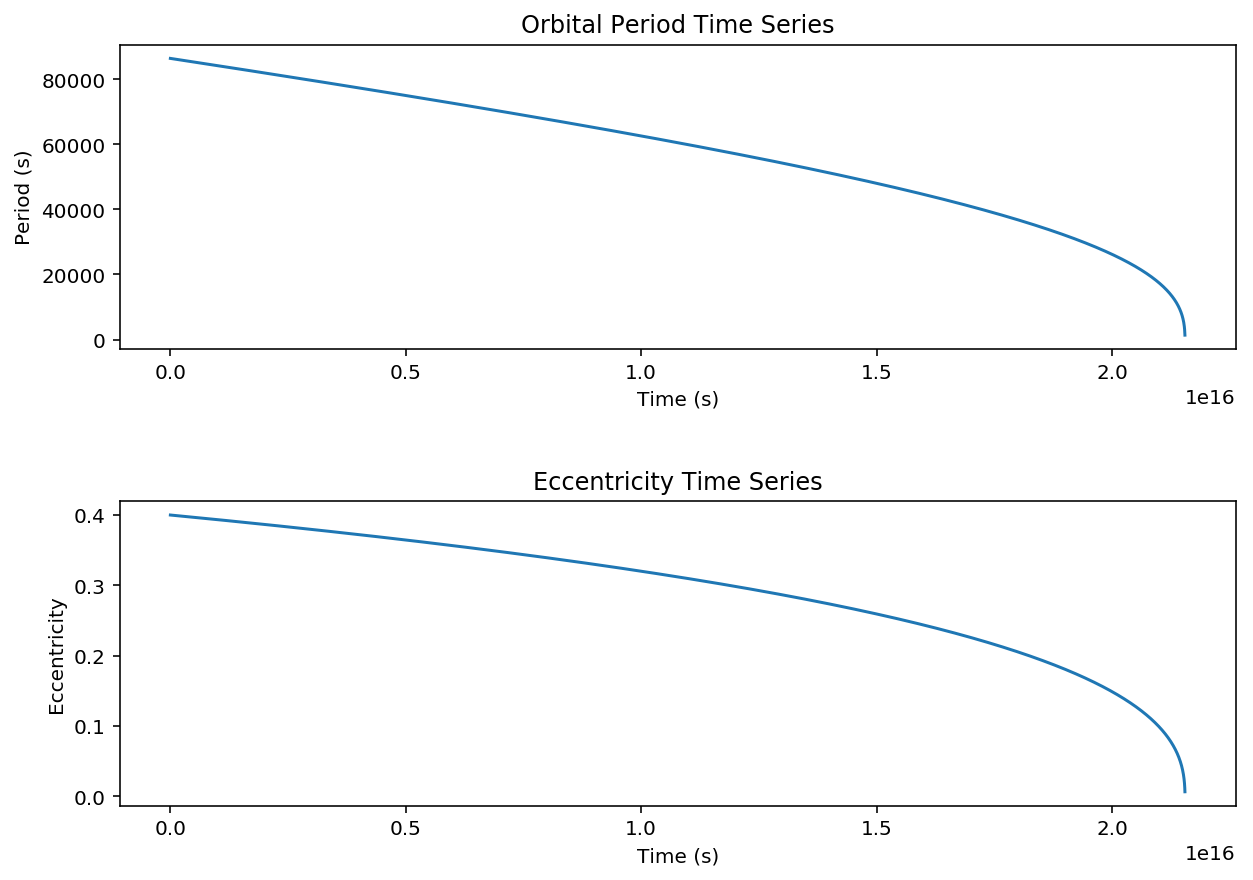

In [48]:
# Plotting: 

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(ts, pts)
plt.title("Orbital Period Time Series")
plt.ylabel("Period (s)")
plt.xlabel("Time (s)")

plt.subplot(2,1,2)
plt.plot(ts, ets)
plt.title("Eccentricity Time Series")
plt.xlabel("Time (s)")
plt.ylabel("Eccentricity")

plt.subplots_adjust(hspace=.5)